In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"  #To run the cell create your own api in kaggle


In [2]:
#Importing The Dataset From Kaggle API
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 93% 81.0M/86.8M [00:00<00:00, 124MB/s]
100% 86.8M/86.8M [00:00<00:00, 135MB/s]


In [3]:
#Unziping the Dataset
!unzip /content/brain-tumor-classification-mri.zip

Archive:  /content/brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [5]:
import ipywidgets as widgets
#Input and Output
import io
#Public Image Library
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
#for Shuffle Better
from sklearn.utils import shuffle

Train and Test Split

In [6]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/Training',i) #Copy the path of the training folder
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/Testing',i) #Copy the path of the test folder
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [7]:
#Shuffling the train and test image randomly
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [8]:
#Spliting the Dataset into train and test set
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=101)

In [9]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
74/74 [==============================] - 24s 140ms/step - loss: 1.8684 - accuracy: 0.2656 - val_loss: 1.3647 - val_accuracy: 0.3244
Epoch 2/20
74/74 [==============================] - 7s 92ms/step - loss: 1.3437 - accuracy: 0.2997 - val_loss: 1.3310 - val_accuracy: 0.3626
Epoch 3/20
74/74 [==============================] - 7s 91ms/step - loss: 1.0771 - accuracy: 0.5385 - val_loss: 1.1076 - val_accuracy: 0.5344
Epoch 4/20
74/74 [==============================] - 7s 90ms/step - loss: 0.9105 - accuracy: 0.6092 - val_loss: 0.8509 - val_accuracy: 0.6221
Epoch 5/20
74/74 [==============================] - 7s 93ms/step - loss: 0.7593 - accuracy: 0.6722 - val_loss: 0.6759 - val_accuracy: 0.7061
Epoch 6/20
74/74 [==============================] - 7s 91ms/step - loss: 0.6962 - accuracy: 0.7101 - val_loss: 0.7098 - val_accuracy: 0.6679
Epoch 7/20
74/74 [==============================] - 7s 91ms/step - loss: 0.5995 - accuracy: 0.7531 - val_loss: 0.7127 - val_accuracy: 0.6527
Epoch 8/20


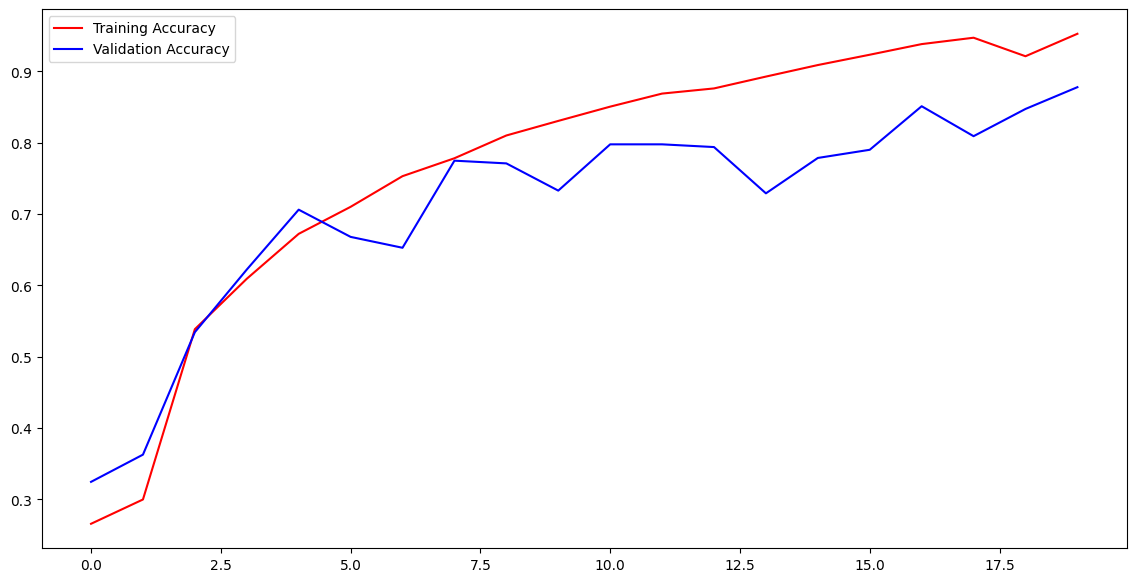

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

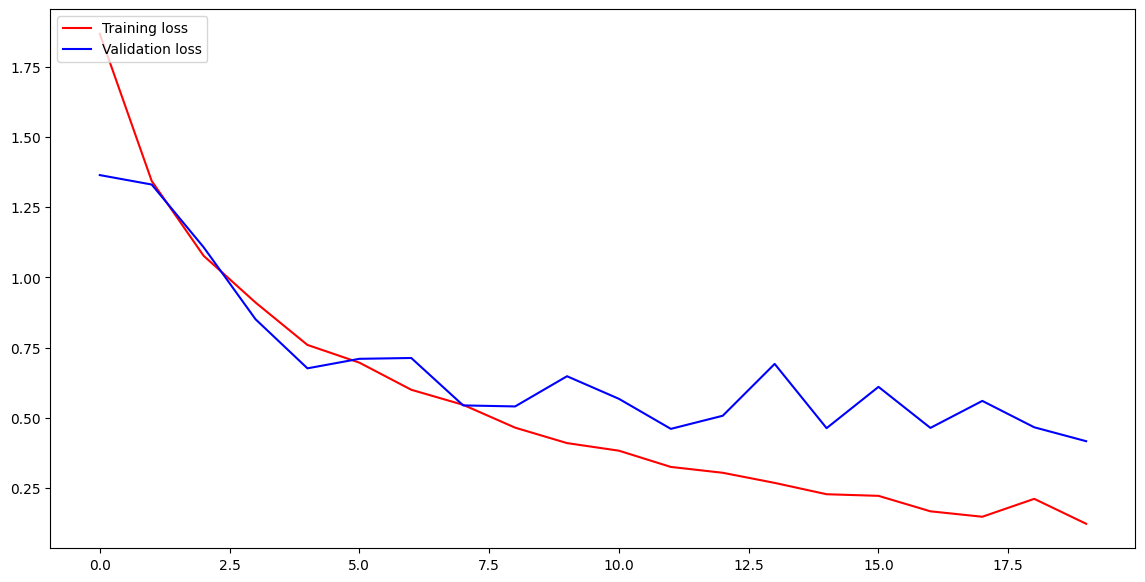

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [28]:
img = cv2.imread('/content/Testing/meningioma_tumor/image(102).jpg') #Paste the image to predict
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [29]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

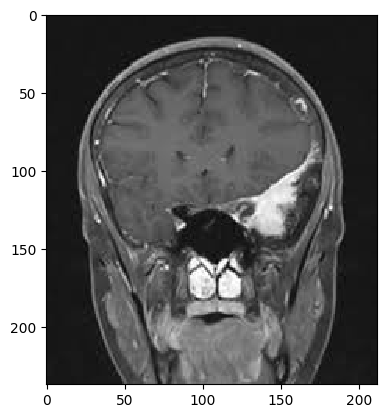

In [30]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/Testing/meningioma_tumor/image(102).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [31]:
a=model.predict(img_array)
indices = a.argmax()
if indices == 0:
  print("Glioma Tumor")
elif indices == 1:
  print("Meningioma Tumor")
elif indices == 2:
  print("No Tumor")
elif indices == 3:
  print("Pituitary Tumor")
else :
  print("No Prediction")

1/1 [==============================] - 0s 20ms/step
Meningioma Tumor
